# DEEP LEARNING 

## LOGISTIC REGRESSION

ilk önce kütüphaneleri import ediyoruz

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')# bazı algoritmalara güncelleme geldiği zaman bize bir uyarı gelmemesi için

(-0.5, 63.5, 63.5, -0.5)

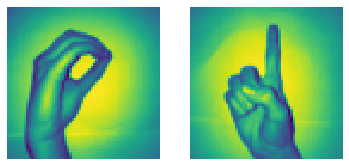

In [89]:
x_l=np.load('X.npy')# verilirimizi load ettik ilk önce 
Y_l=np.load('Y.npy')
img_size=64# bu datasette tanımlıydı zaten
plt.subplot(1,2,1)#matplotlib'de görüntüleri çizmenin en yaygın yolu imshow()
plt.imshow(x_l[250].reshape(img_size,img_size))#reshape yapıyorum oda şu demek oluyor benim datamı 64x64'luk bir image haline getir
plt.axis('off')# buda x y eksenini göstermemesi için yapıyoruz
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size,img_size))
plt.axis('off')


In [90]:
X=np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)
#x_l datasında 204'den 409'a kadar=0 822'den 1027'e kadar 1 bulunmaktadır.Onları concatenate ile birleştiriyoruz
#axis=0 diyerek de aşağıdan yukarı birleştirme yapıyoruz
#bide bunlar için label birleştirmem lazım
z=np.zeros(205)#205 tane 0
o=np.ones(205)#205 tane 1
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)# axis=0:aşağıdan yukarı birleştir demek bunları y datamın içerisine atıyorum
# z ve o'yu concatenate ile sutün bazında birleştirdik ve de reshape  X'de bulunan satır sayısı kadar satır yaptık ve de tek sütun 
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)
print(X)
print(Y)
#axis=0 normal matrisi alt alta birleştirir reshape(X.shape[0],1) ilede biz bu matrisi tek sutun hale getirdik aşağıdan yukarı 

X shape:  (410, 64, 64)
Y shape:  (410, 1)
[[[0.43529412 0.44705883 0.4509804  ... 0.41568628 0.40392157 0.39215687]
  [0.44705883 0.45882353 0.4627451  ... 0.42745098 0.41960785 0.40392157]
  [0.45490196 0.46666667 0.47843137 ... 0.4392157  0.43529412 0.42352942]
  ...
  [0.58431375 0.6039216  0.62352943 ... 0.5372549  0.52156866 0.5058824 ]
  [0.5411765  0.5568628  0.57254905 ... 0.5254902  0.5137255  0.5019608 ]
  [0.5176471  0.5372549  0.5529412  ... 0.5176471  0.5058824  0.49411765]]

 [[0.5137255  0.5254902  0.53333336 ... 0.46666667 0.45882353 0.4509804 ]
  [0.5254902  0.5372549  0.54509807 ... 0.4745098  0.47058824 0.45882353]
  [0.53333336 0.54509807 0.5529412  ... 0.48235294 0.4745098  0.4627451 ]
  ...
  [0.47843137 0.4862745  0.4862745  ... 0.41568628 0.40784314 0.4       ]
  [0.46666667 0.46666667 0.45882353 ... 0.40392157 0.39607844 0.3882353 ]
  [0.4509804  0.44705883 0.4392157  ... 0.39607844 0.3882353  0.3764706 ]]

 [[0.81960785 0.827451   0.83137256 ... 0.84313726 0.

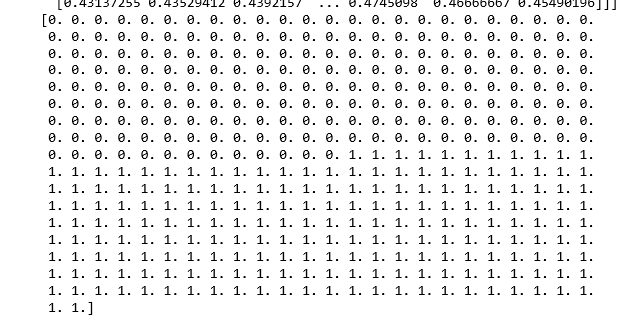
eğer reshape(X.shape[0],1) yapmazsak bu şekilde olacaktı

Şimdi sırada elimizde olan datayı ikiye bölmek test ve train olarak train olan bizim modelimizi eğiteceğimiz test ile modelimizin olup olmadığını test edeceğimiz data datamızın %15 test datası 

In [91]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
# burada her kodu çalıştırdığımda aynı randomlukta bölmesi için yazıyoruz bu random_state'yi
# bu kod bize yukarıdaki sırada 4 tane output return ediyor
number_of_train = X_train.shape[0]#X_train'lerimin sayısına bakmak istiyorum 
number_of_test = X_test.shape[0]
print(X_train)

[[[0.7764706  0.7921569  0.79607844 ... 0.81960785 0.8117647  0.79607844]
  [0.7921569  0.8        0.80784315 ... 0.827451   0.81960785 0.8039216 ]
  [0.83137256 0.8352941  0.84313726 ... 0.8235294  0.81960785 0.80784315]
  ...
  [0.7764706  0.78431374 0.7882353  ... 0.7882353  0.78431374 0.7764706 ]
  [0.77254903 0.7764706  0.78431374 ... 0.78431374 0.7764706  0.77254903]
  [0.7647059  0.76862746 0.7764706  ... 0.78431374 0.7764706  0.76862746]]

 [[0.4627451  0.47058824 0.48235294 ... 0.45882353 0.4509804  0.44313726]
  [0.47058824 0.4862745  0.49411765 ... 0.47058824 0.4627451  0.4509804 ]
  [0.4745098  0.4862745  0.49803922 ... 0.48235294 0.47058824 0.45882353]
  ...
  [0.52156866 0.5372549  0.54901963 ... 0.5058824  0.49411765 0.48235294]
  [0.5137255  0.5254902  0.5411765  ... 0.5019608  0.49019608 0.47843137]
  [0.5019608  0.5137255  0.5294118  ... 0.49019608 0.47843137 0.46666667]]

 [[0.5686275  0.5803922  0.5921569  ... 0.4509804  0.4392157  0.42745098]
  [0.5803922  0.592156

Şimdi sıradaki benim Y bir vektör yani iki boyutlu X'imiz 64x64 lük bir matris. Bu X.shapede 2 boyutlu hale getirmeliyiz flatten hale getiriyoruz yani iki boyutlu hale getiriyoruz 

In [92]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


### Transpozunu alıyoruz

Transpozunu almamızın sebebi çarpımı yapabilmek için bunu şimdide yapabiliriz aslında sonrada ama biz önceden tercih ediyoruz

In [93]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [38]:
print(y_train)

[[1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
  0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
  0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
  0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
  1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
  0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
  1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 

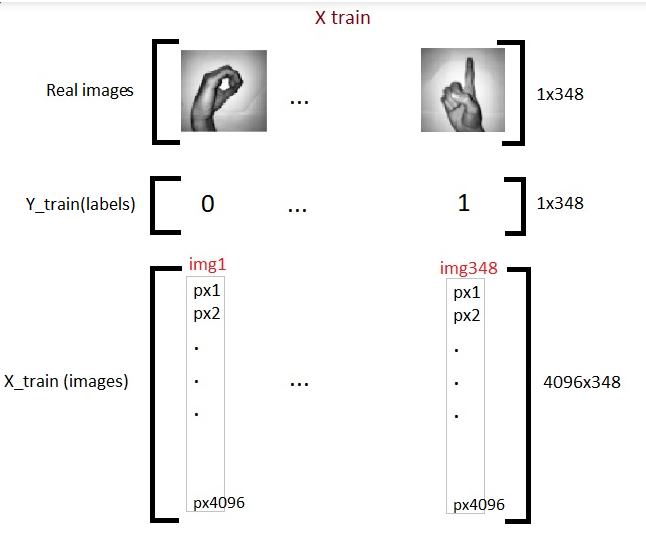

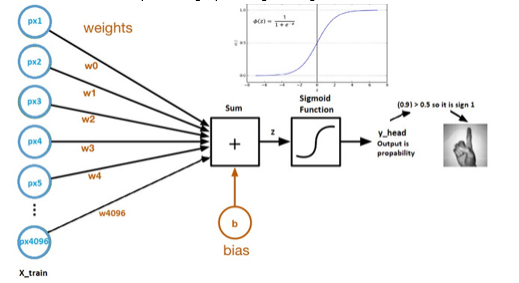

python da method tanımlamaya bakalım ilk önce.

In [39]:
def dummy(parameter):
    dummy_parameter=parameter+5
    return dummy_parameter
result=dummy(3)
result

8

### INITIALIZE PARAMETERS

* simdi parametrelerimizi initialize edelim.
* bizim 4096lık bir array'e ihtiyacımız var.Çünkü 4096 tane pixselimiz var

In [40]:
def initialize_weights_and_bias(dimension):#dimension bir resmimin boyutu
    w=np.full((dimension,1),0.01)# full methodu dimension,1 lik kadar 496,1lik bir matris oluşturur 
    # benim 496,1 kadar matris oluşturur içine de 0.01 koyar
    b=0.0
    return w,b

In [41]:
w,b=initialize_weights_and_bias(4096)

In [25]:
b

0.0

In [12]:
w

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [0.01],
       [0.01],
       [0.01]])

In [13]:
w.shape

(4096, 1)

### FORWARD PROPAGATION

#### SIGMOID FUNCTION

In [42]:
#z=np.dot(w.T,x_tarin)+b(w'lerle piksellerimi,resimlerimi çarpıyorum sonra bias ile topluyorum)
def sigmoid(z):
    y_head=1/(1+np.exp(-z))#np.exp e^-z neye eşit onu veriyor
    return y_head

In [29]:
y_head=sigmoid(10)

In [30]:
y_head

0.9999546021312976

In [32]:
y_head=sigmoid(0)
y_head

0.5

In [43]:
def forward_propagation(w,b,x_train,y_train):# y_train'i karşılaştırabilmek için kullanıcaz
    z=np.dot(w.T,x_train)+b # np.dot function Bu işlev iki dizinin iç çarpımını döndürür.2 Boyutlu vektörler için matris çarpımına eşdeğerdir.
    y_head=sigmoid(z)#probabilistic bir değerdir(0 ile 1 arasında probabilistic bir değer döndürür)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]#loss değerlerini toplayıp cost değerini elde ediyoz
    return cost

Şimdi cost'umuza göre geri dönüp weight ve bias değerlerimizi güncellicez.

#### BACKWARD PROPAGATION

In [44]:
def forward_backward_propagation(w,b,x_train,y_train):
    #forward propagation
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1] # x_train.shape[1] is for scaling 
    #backward propagation
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]# bu cost'un weight'e göre türevini alıyoruz
    #shape[1] bu aslında benim sample sayım  nedenide scal etmek için etmezsek değerler çok büyük çıkıcak
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]#burada da biasa göre yapıyoruz
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}# gradients yani bias ve weightimin türevi
    return cost,gradients


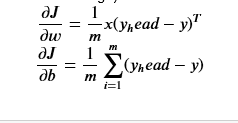

yukarıda bu formülü yazdık aslında 

* biz bir parametreyi nasıl initializing edeceğimizi öğrendik
* cost fonksiyonunu forward propagation kullanarak bulmayı öğrendik
* updating(learning) parameters(weight and bias )


şimdi bias ve weightlerimizi güncellememizi yapicaz buraya kadar türevlerini aldık.

#### Updating(learning) parameters

In [45]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list=[]
    cost_list2=[]
    index=[]
    for i in range(number_of_iterarion):#number_of_iteration benim kaç kes backward propagation ve forward propagation yapacağım aslında
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        #bias ve weight güncelledik eski biasdan learning_rate çarpılmış türevi alınmış weight'ı çıkardım
        if i % 10 == 0:
            cost_list2.append(cost)
            #her 10 adımda bir cost'umu depoluyorum burda
            #bunu neden yapıyorum her costu print etmek istemiyorum çünkü
            index.append(i)
            print("cost after iteration %i:%f"%(i,cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()
    return parameters,gradients,cost_list

buraya kadar bias ve weight güncelledik parametrelerimiz update edildi

biz datamızı fit ettik.Biz modelimizi oluşturduk diyebiliriz.Çünkü minimum costu veren bias ve weight değerlerine sahibiz. 

#### Prediction

Bakalım ne kadar iyi bulabilmişiz modeli

In [46]:
def predict(w,b,x_test):
    #forward propagation yapıyoruz bunun kodunu yazmak yerine methoduda çağırabiliriz
    z=sigmoid(np.dot(w.T,x_test)+b)# z aslında y_head
    Y_prediction=np.zeros((1,x_test.shape[1]))
    #bir prediction arrayı oluşturuyorum sıfırlardan oluşturuyorum
    #bunu yapmazsam kodum çok yavaş çalışır onun için bunu yaparak yer ayırtmış oluyoruz
    for i in range(z.shape[1]):# tüm z yi dolaşıyoruz
        if z[0,i]<=0.5:#0.5 büyük ve küçük diye ikiye ayırdık
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
            
    return Y_prediction

### Implementing Logistic Regression 

cost after iteration 0:14.014222
cost after iteration 10:13.526742
cost after iteration 20:13.039344
cost after iteration 30:12.551926
cost after iteration 40:12.064526
cost after iteration 50:11.577116
cost after iteration 60:11.089710
cost after iteration 70:10.602303
cost after iteration 80:10.114896
cost after iteration 90:9.627489


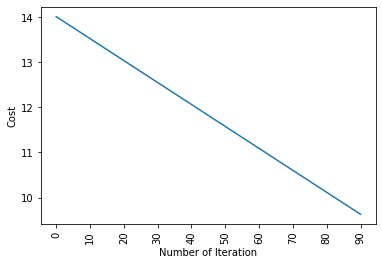

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %
[46.7741935483871]
cost after iteration 0:14.014222
cost after iteration 10:13.039344
cost after iteration 20:12.064526
cost after iteration 30:11.089710
cost after iteration 40:10.114896
cost after iteration 50:9.140082
cost after iteration 60:8.165268
cost after iteration 70:7.190455
cost after iteration 80:6.215648
cost after iteration 90:5.240879


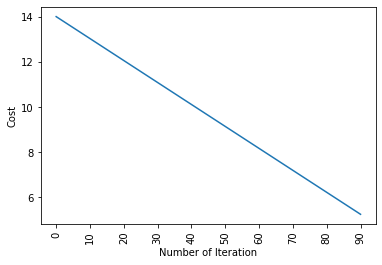

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %
[46.7741935483871, 46.7741935483871]
cost after iteration 0:14.014222
cost after iteration 10:12.551926
cost after iteration 20:11.089710
cost after iteration 30:9.627489
cost after iteration 40:8.165268
cost after iteration 50:6.703050
cost after iteration 60:5.240878
cost after iteration 70:3.779551
cost after iteration 80:2.333572
cost after iteration 90:1.109443


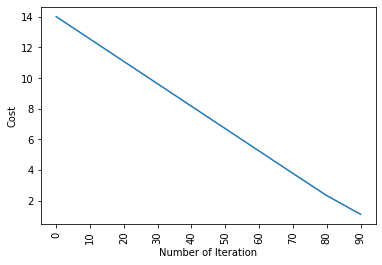

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %
[46.7741935483871, 46.7741935483871, 46.7741935483871]
cost after iteration 0:14.014222
cost after iteration 10:12.064526
cost after iteration 20:10.114896
cost after iteration 30:8.165268
cost after iteration 40:6.215647
cost after iteration 50:4.266363
cost after iteration 60:2.333185
cost after iteration 70:0.876903
cost after iteration 80:0.686217
cost after iteration 90:0.678169


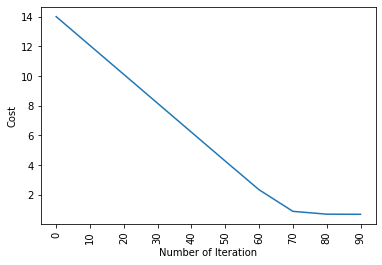

train accuracy: 75.28735632183908 %
test accuracy: 66.12903225806451 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451]
cost after iteration 0:14.014222
cost after iteration 10:11.577116
cost after iteration 20:9.140082
cost after iteration 30:6.703050
cost after iteration 40:4.266355
cost after iteration 50:1.871539
cost after iteration 60:0.709374
cost after iteration 70:0.679524
cost after iteration 80:0.672935
cost after iteration 90:0.666553


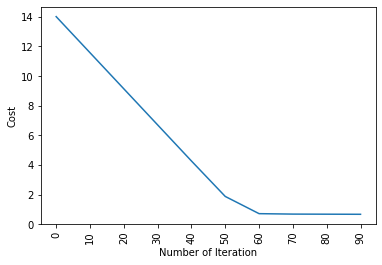

train accuracy: 81.89655172413794 %
test accuracy: 72.58064516129032 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451, 72.58064516129032]
cost after iteration 0:14.014222
cost after iteration 10:11.089710
cost after iteration 20:8.165268
cost after iteration 30:5.240875
cost after iteration 40:2.332451
cost after iteration 50:0.707406
cost after iteration 60:0.678151
cost after iteration 70:0.670364
cost after iteration 80:0.662783
cost after iteration 90:0.655387


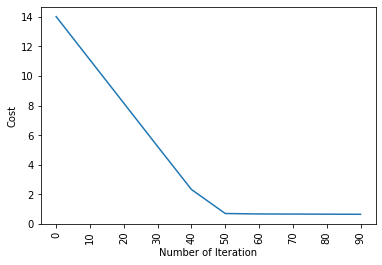

train accuracy: 86.7816091954023 %
test accuracy: 79.03225806451613 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451, 72.58064516129032, 79.03225806451613]
cost after iteration 0:14.014222
cost after iteration 10:10.602303
cost after iteration 20:7.190455
cost after iteration 30:3.779468
cost after iteration 40:0.863516
cost after iteration 50:0.679488
cost after iteration 60:0.670362
cost after iteration 70:0.661535
cost after iteration 80:0.652958
cost after iteration 90:0.644622


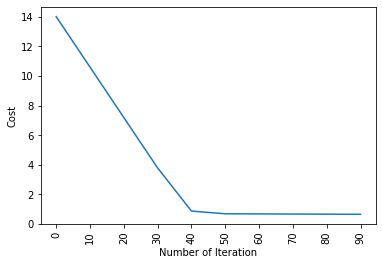

train accuracy: 88.50574712643679 %
test accuracy: 80.64516129032258 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451, 72.58064516129032, 79.03225806451613, 80.64516129032258]
cost after iteration 0:14.014222
cost after iteration 10:10.114896
cost after iteration 20:6.215647
cost after iteration 30:2.331769
cost after iteration 40:0.684818
cost after iteration 50:0.672929
cost after iteration 60:0.662778
cost after iteration 70:0.652954
cost after iteration 80:0.643446
cost after iteration 90:0.634241


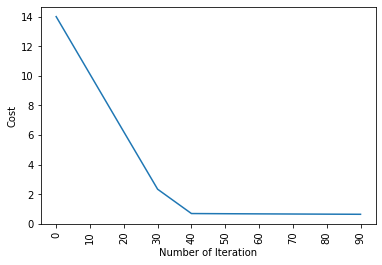

train accuracy: 89.65517241379311 %
test accuracy: 82.25806451612902 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451, 72.58064516129032, 79.03225806451613, 80.64516129032258, 82.25806451612902]
cost after iteration 0:14.014222
cost after iteration 10:9.627489
cost after iteration 20:5.240872
cost after iteration 30:1.087929
cost after iteration 40:0.678135
cost after iteration 50:0.666543
cost after iteration 60:0.655376
cost after iteration 70:0.644613
cost after iteration 80:0.634235
cost after iteration 90:0.624228


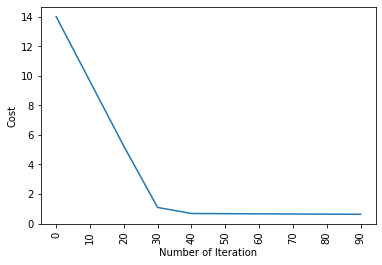

train accuracy: 90.51724137931035 %
test accuracy: 83.87096774193549 %
[46.7741935483871, 46.7741935483871, 46.7741935483871, 66.12903225806451, 72.58064516129032, 79.03225806451613, 80.64516129032258, 82.25806451612902, 83.87096774193549]


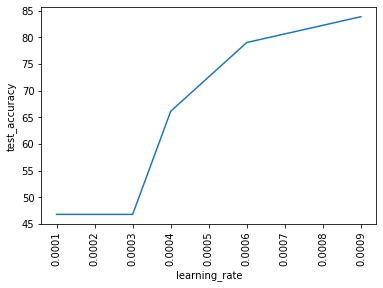

In [47]:
def logistic_regression(x_train, y_train, x_test, y_test, num_iterations):
    # initialize
        test_accuracies=[]
        dimension =  x_train.shape[0]  # that is 4096
        w,b = initialize_weights_and_bias(dimension)
    #do not change learning rate
    #w ve b initialize ediyoruz. Logistic regression'un ilk adımını 
    #biz daha sonra forward propagation ve backward propagation yaparak weight ve biaslarımızı güncellicez 
    #bunu biz update methodu içine yazmıştık
        learning_rates=np.arange(0.0001,0.001,0.0001)
        for learning_rate in learning_rates:
            parameters, gradients, cost_list = update(w, b, x_train, y_train,learning_rate,num_iterations)
            #güncellenmiş parameters, gradienst ve cost listimi döndürüyor
            y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
            y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
            # y_predict_train etmemizin sebebi underfitting ve overfitting için 
            # eğittiğimiz datada test ediyoruz
            # Print train/test Errors
            test_accuracy=(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)
            test_accuracies.append(test_accuracy)
            #accuracy kaçını doğru tahmin ettim kaçını yanlış bunu öğreniyoruz
            print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
            print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
            print(test_accuracies)
            
        plt.plot(learning_rates,test_accuracies)
        plt.xticks(learning_rates,rotation='vertical')
        plt.xlabel('learning_rate')
        plt.ylabel('test_accuracy')
        plt.show()        
logistic_regression(x_train, y_train, x_test, y_test, num_iterations = 100)

train accuracy ve test accuracy den ezberleyip ezberlemediğini test ediyoruz

## Sklearn kütüphanesi ile yazacağız tüm bu işlemleri

* sklearn de logistic regression methodu var
* bu methodun birçok parametresi var
* sklearn kütüphanesinde accuracy daha yüksek çıkabilir çünkü default değeri olan bir sürü bizim kullanmadığımız para metreler var bunlar iyileştirmek için modelimizi kullanılan parametreler

In [48]:
from sklearn import linear_model#sklearn kütüphanesinden linear_model kısmını  import ediyorum
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))# bu fit aslında update metodumuzla aynı şey
#bias ve weightlarımı update eden
#tranpozunu alıyorum logistic regression öyle istiyor bir nevi
#score methodu ise fit ettiğimiz modelimizi x_test ile test ediyor sonra y_test ile karşılaştırıyor
#x_test'i kullanarak predictınımı yapıyorum y_test ilede karşılaştırıyorum
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
#train ettiğimiz modelimizi train datamla yine test edersem %100 vermiş

test accuracy: 0.967741935483871 
train accuracy: 1.0 


# ARTIFICIAL NEURAL NETWORK

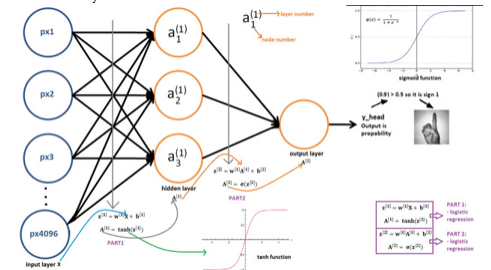

## Size of layers and initializing parameters weights and bias

In [94]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

random.randn ile bize random sayılar üretiyor ben bunları 0.1 ile çarparak küçültüyorum tamam peki boyutu; boyutunu 3,x_train.shape[0] ile belirliyoruz buda 3,4096 neden logistic regressionda 1,4096 tamam ama onda direk output layer'ım vardı bunda 3 tane nod içeren hidden layer'ım var.(3,4096) matrisi 4096 bir matrisle çarptığında geri 3,1 lik bir matris kalır 

biasda da toplama yapacağım için boyutunun 3,1 olması gerekmektedir, matriste toplama işlemi yapabilmem için

0.1 ile çarpmamın sebebi küçük bir sayı elde edebilmek için yapıyorum

In [10]:
y_train.shape[0]

1

A'nın size 3,1 ben 3,1 ile 1,3 çarparsam 1,1'lik  elde ederim ve böylelikle birtane nod'um olur output layer bir noddan oluşuyor

ikinci bias'da ozaman 1,1 olacak çünkü 1,1 lik matrisle toplamam için 1,1 olması gerek

z sayımı elde etmiş oluyorum burdan 

normalde nod sayım belli olmasaydı fonksiyonun parametrelerine nod eklicektim ve onuda değiştirmek için kullanıcaktım
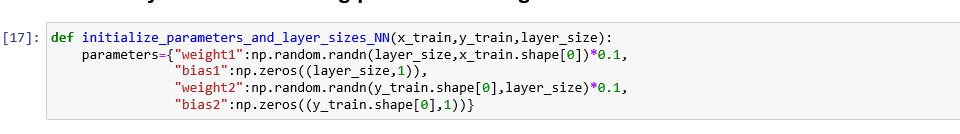

## Forward Propagation

In [95]:
def sigmoid_NN(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [51]:
y_head=sigmoid_NN(0)
y_head

0.5

In [96]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

X_train diye belirtilen benim piksellerim oluyor

weight'lerim ile piksellerimi çarpıyorum biaslarla topluyorum.Bu z1 oluşturuyor, bunu tanh fonksiyonuna sokuyor burdan A1 oluşuyor.Bu hidden layerımın içeriği oluyor. Input gibi düşünebiliriz.Hidden layerımı weight ile çarpıyorum bias ile topluyorum Z2 değerimi elde ediyorum bunuda sigmoid fonksiyonuna sokup A2 değerimi elde ediyorum

##### *dot:*
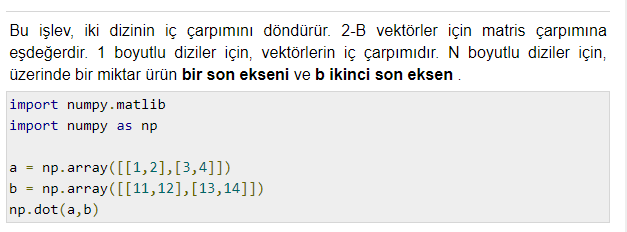

Aslında iki tane logistic regression yapıyoruz. A2 aslında y_head olarakda ifade edilebilir. 0 1 arasında bir değer probabilistik bir değer.Neden 0 1 arasında çünkü sigmoid function aldığı inputu 0 ile 1 arasında sınırlayan bir function.Amacımız 0.5 threshold koyup binarry classification yapabilmek.

return ettiğim kısımları;daha sonra kullanacağım için return ediyorum. Update kısmında mesela kullanacağız.Dictionary şeklinde return etmemizin sebebide 4 tane olmaları ve isimlerini bilmemden kaynaklı daha kolay oluyor.

## Los And Cost Function

In [97]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

buradaki Y kafamızı karıştırmasın o parametre ismi y_train verirsek y_train olur mesela

bu Loss functionımın formülü
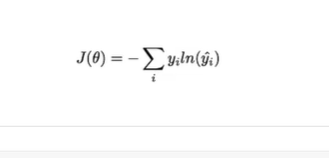

* A2'yi input alıyor neden çünkü output layer'ımın output'u A2 bu yüzden.
* Y değerim gerçekte olan değerlerim bunları A2 ile karşılaştırıcaz bu yüzden onu input olarak kullanıyoruz.
* Burada parameters'ları input almışız ama kullanmamışız.
* formülün başındaki - ifadeyi costda ekliyoruz sıkıntı değil 
* A2 nin log alıyoruz ve y ile multiply ediyoruz aşağıda function ne işe yaradığı belirtilmiş
* loss functionda da bu costları topluyoruz Y'yi kullanarak bunu normalize ediyorum

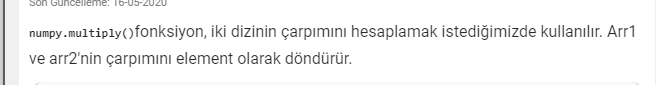

In [17]:
Y.shape[1] # bunu bu datasette kullanmasakta olur başka datasetler için değişir

1

In [18]:
x_train.shape[1]

348

## Backward Propagation 

In [98]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y#cost'un Z2 göre türevi
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]# cost'un W2'ye göre türevi
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]#cost'un b2 göre türevi
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))#cost'un Z1'e göre türevi
    dW1 = np.dot(dZ1,X.T)/X.shape[1]#cost'un W1'e göre türevi
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]#cost'un b1'e göre türevi
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

###### np.power:
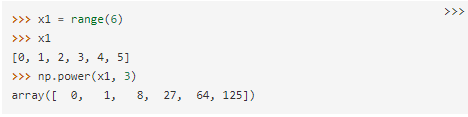
bizim kodumuzda da karesini alıyor

###### keepdims:
bu array olarak tutuyor sum işlemimin sonucu ne olursa olsun array olarak yazıyor
###### grads:
w1,w2,b1,b2 değişimleri yani costtun bunlara göre olan türevlerini depoluyorum. Bunları döndürüp update methodumda kullanıcam.

* X bizim resimlerimiz Y bizim labellarım
* benim cost functiondan w1 gidebilmem için costtun z2 göre türevi z2'ninde w1 göre türevini almam lazım 
* bias içinde aynı şey geçerli 
* ara steplerim olduğu için direk costtan w1 bulamam onun için aradakileri yapıyorum ilk
 

## Update Parameters

In [108]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.03):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

parametrelerimden learning_rate ile çarpılmış türevleri çıkarıyoruz güncel parametrelerimizi buluyoruz
* weight1= önceki weight1'im - learning_rate* costumun weight'e göre değişimi

hızlı bir şekilde parametrelerimi güncelleyip minimum noktayı bulmaya çalışacağım 

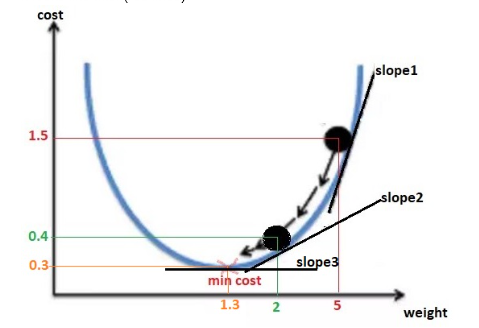

biasda da aynısı bias'ımdan learning_rate oranında costum'un bias1'e göre olan türevini çıkartıyorum 

backward progpagation kısmını tamamlamış olduk yani weightlerimizi update etmiş olduk yani artık modelimiz hazır.Parametrelerimizi update edip öğrendiğimize göre biz learning kısmını tamamladık demek.Şuan test yani predict için bir modelimiz hazır

## Prediction with learnt parameters weight and bias

artık ben weight ve biasımı biliyorum birtane test için image'm var bunda piksellerimle weightle çarpıyorum biasımla topluyorum bir z değeri elde ediyorum bu z değerini tanh fonksiyonuna sokuyorum(activation function) buradan A1 değerini elde etmiş oluyorum.Hidden layer'ıma gelmiş oluyorum A1 değerimi weight ile çarpıp bias ile topluyorum z2 değerimi elde etmiş oluyorum bunu sigmoid function sokup A2 değerimi yani y_head değerimi elde etmiş oluyorum. y_head probabilistic bir değer.0.5 gibi bir threshold var ondan 0.5 küçükse
 0 büyükse 1 şeklinde bir çıktı verir

In [104]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    # ilk başta forward_propagation ile A2 yani y_head buluyorum
    Y_prediction = np.zeros((1,x_test.shape[1]))
    #ilk önce Y_prediction adında bir array oluşturuyorum bunu daha hızlı olması için yapıyorduk
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Create ANN Model 

bu zamana kadar oluşturduğumuz tüm kodları birleştiricez

Cost after iteration 0: 0.352685
Cost after iteration 100: 0.337309
Cost after iteration 200: 0.325645
Cost after iteration 300: 0.321174
Cost after iteration 400: 0.255234
Cost after iteration 500: 0.098325
Cost after iteration 600: 0.077839
Cost after iteration 700: 0.111655
Cost after iteration 800: 0.091658
Cost after iteration 900: 0.225630
Cost after iteration 1000: 0.038181
Cost after iteration 1100: 0.039729
Cost after iteration 1200: 0.037745
Cost after iteration 1300: 0.028223
Cost after iteration 1400: 0.025729


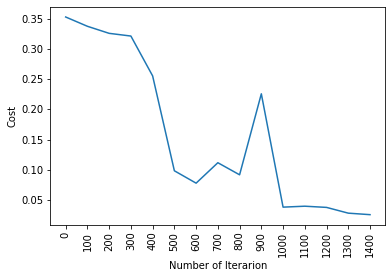

train accuracy: 49.42528735632183 %
test accuracy: 53.225806451612904 %


In [109]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):# x_train ve y_train ile modelimizi eğitmiş oluyoruz 
    #bunlarla weight ve biası buluyoruz
    #daha sonra bu oluşan modeli x_test ve y_test ile test ediyoruz yani prediction yapicam
    # number of iterations ise öğrenme süreci ne kadar sürsün ne kadar iterasyon yapalım demek için
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    # bunları ilk başta random bir şekilde weight ve biasımı initialize ettik boyutunu belirledik burda weight ve biasların
    #bundan sonra forward propagation yapıyoruz 
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=1500)

# L LAYER NEURAL NETWORK 

hidden layer  sayım azsa benim hiddenlarım resmimin belli başlı basit bileşenlerini keşfedeler

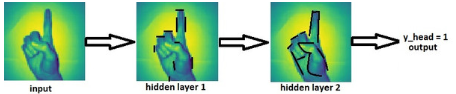

layers arttıkça kompleks şekilleri öğrenmeye başlarız

mesela baş parmağı anlamaya başlıyor bir süre sonra 

hidden layer sayım :2 olucak toplamda da 8 nodes kullanıcaz

In [111]:
x_train,x_test,y_train,y_test=x_train.T,x_test.T,y_train.T,y_test.T

keras kütüphanesi yüzünden T alıyoruz. Kerasda bunu gerek var